In [3]:
# import necessaryy packets
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

Task 1 Import a 311 NYC service request

In [5]:
# Load the dataset using pandas
df_NYC_dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

In [6]:
# Head method to view first 3 rows of the dataset
df_NYC_dataset.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 23:59,1/1/2016 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 23:59,1/1/2016 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 23:59,1/1/2016 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 23:57,1/1/2016 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 23:56,1/1/2016 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [7]:
df_NYC_dataset.shape

(300698, 53)

In [8]:
df_NYC_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [9]:
df_NYC_dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

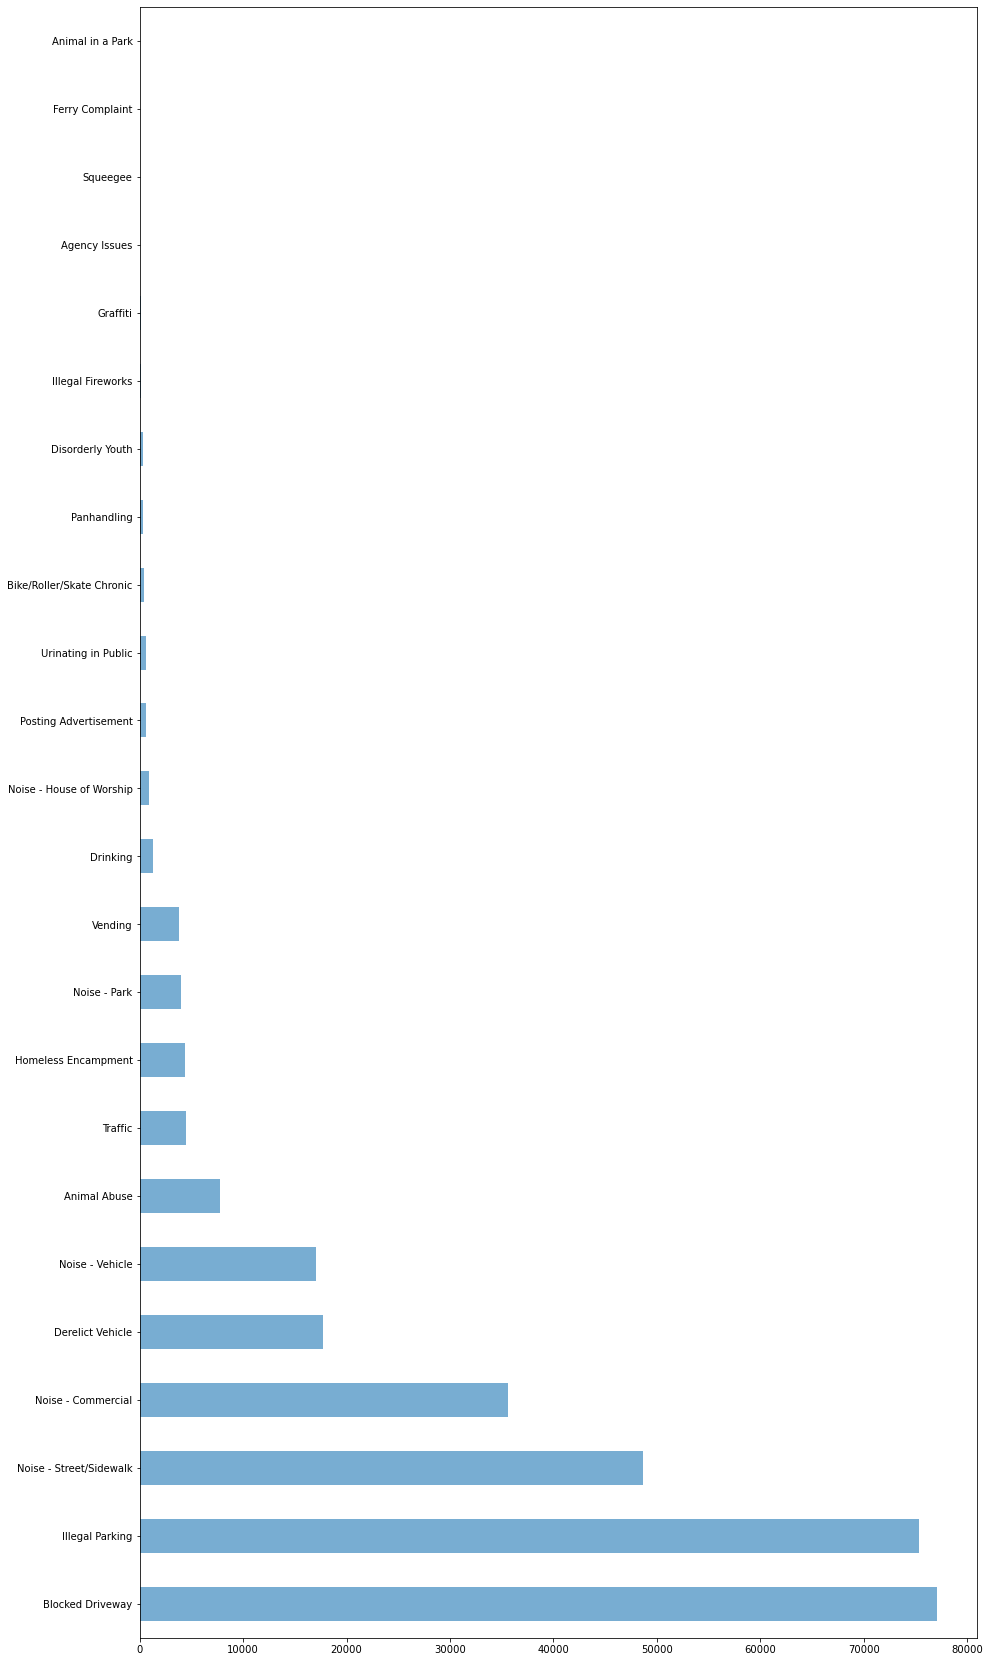

In [10]:
#Complaint type Breakdown with bar plot to figure out majority of complaint types and top 10 complaints
df_NYC_dataset['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6,figsize=(15,30))
plt.show()


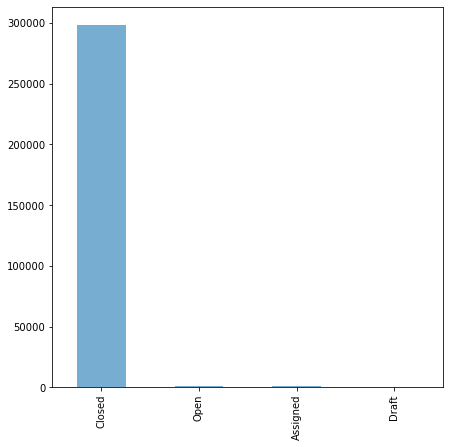

In [11]:
#Have a look at the status of tickets
df_NYC_dataset['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

In [12]:
#Group dataset by complaint type to display plot against city
groupedby_complainttype = df_NYC_dataset.groupby('Complaint Type')

In [16]:
#To get nan values in the entire dataset
df_NYC_dataset.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [17]:
#fix blank values in City column
df_NYC_dataset['City'].dropna(inplace=True)

In [18]:
#Shape after dropping nan values
df_NYC_dataset['City'].shape

(300698,)

In [21]:
#count of null values in grouped city column data
df_NYC_dataset['City'].isnull().sum()

2614

In [22]:
#fix those NAN with "unknown city" value instead
df_NYC_dataset['City'].fillna('Unknown City', inplace =True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)

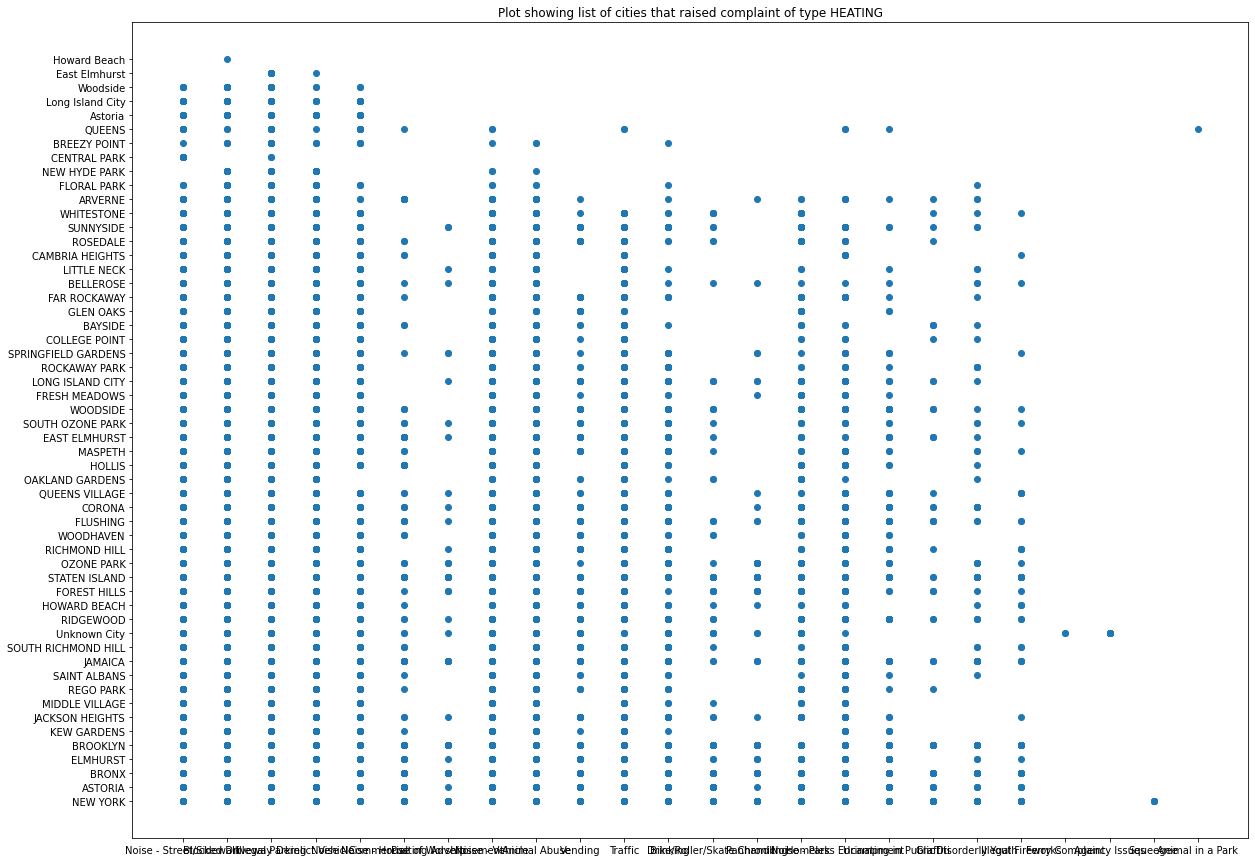

In [24]:
#Scatter plot displaying all the cities that raised complaint of type 'HEATING'
plt.figure(figsize=(20, 15))
plt.scatter(df_NYC_dataset['Complaint Type'],df_NYC_dataset['City'])
plt.title('Plot showing list of cities that raised complaint of type HEATING')
plt.show()


In [25]:
#Find top 10 major complaint types and their counts
groupedby_complainttype['Complaint Type'].value_counts().nlargest(10)

Complaint Type           Complaint Type         
Blocked Driveway         Blocked Driveway           77044
Illegal Parking          Illegal Parking            75361
Noise - Street/Sidewalk  Noise - Street/Sidewalk    48612
Noise - Commercial       Noise - Commercial         35577
Derelict Vehicle         Derelict Vehicle           17718
Noise - Vehicle          Noise - Vehicle            17083
Animal Abuse             Animal Abuse                7778
Traffic                  Traffic                     4498
Homeless Encampment      Homeless Encampment         4416
Noise - Park             Noise - Park                4042
Name: Complaint Type, dtype: int64

In [26]:
#fix Location type those NAN with "unknown Location" value instead
df_NYC_dataset['Location Type'].fillna('Unknown Loc', inplace =True)

In [27]:
df_NYC_dataset['Location Type'].values

array(['Street/Sidewalk', 'Street/Sidewalk', 'Street/Sidewalk', ...,
       'Club/Bar/Restaurant', 'Club/Bar/Restaurant', 'Store/Commercial'],
      dtype=object)

In [28]:
#count of null values in grouped location type column data
df_NYC_dataset['Location Type'].isnull().sum()

0

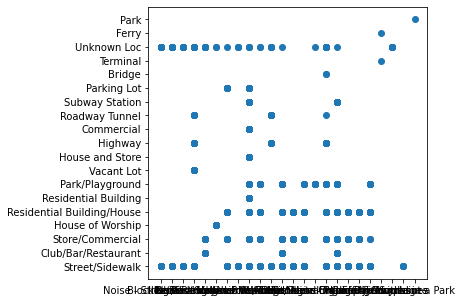

In [30]:
#Plot Major complaint type Heating against location type to check for any pattern
plt.figure(figsize=(5,5))
plt.scatter(df_NYC_dataset['Complaint Type'],df_NYC_dataset['Location Type'])
plt.title='Plot complaint type Heating against location type'
plt.xlabel='Complaint Type'
plt.ylabel='Location Type'
plt.show()
#Plot below gives us a clear picture of the fact that all the complaints rasied of type "HEATING" in 2009 
#occured only in Residential Building! This shows that majority of complaints recorded was from Residential Building!